In [1]:
from divegame import diveGame, zeroBoard
import pickle
from fatal_flaw import fatalFlaw, getActions
import pdb
from softmaxExplain import findStates2
from datetime import datetime
import random
import pandas
from experiment import reconstructStates
import numpy as np
import math
from categorize import categorize, CorrectionType
from matplotlib import pyplot as plt

In [2]:
f = open("Test State Q values", 'rb')
highestPossible = 310
qvalues = pickle.load(f)

f = open("playthrough values", 'rb')
initqvalues, initvvalues = pickle.load(f)


datas = []
vvalues = {}
for state, action in qvalues:
    if state not in vvalues:
        vvalues[state] = qvalues[(state, action)]
    else:
        vvalues[state] = max(qvalues[(state, action)], vvalues[state])

def process(name, expgroup):
    f = open("playdata/" + name, "rb")
    f2 = open("playdata/" + name + "2", "rb")
    data = pickle.load(f)
    mistakeIndex = data['FatalFlawData'][6]
    mistakeState = data['playthrough'][1][0][mistakeIndex]
    mistakeAction = data['playthrough'][1][1][mistakeIndex]
    
    
    d = {}
    
    d['initial score'] = data['playthrough'][-1][0][-1].cash
    initialFraction = d['initial score'] / highestPossible
    data2 = pickle.load(f2)
    d['initialFraction'] = initialFraction
    d['name'] = name
    d['experiment group'] = expgroup
    d['mistake type'] = data['FatalFlawData'][-1]
    d['group'] = data['group']
    testStates = reconstructStates(pickle.load(open("group" + str(data['group'])+ "States", "rb")))
    total = 0
    gA = 0
    for i in range(len(testStates)):
        for j in range(len(testStates)):
            if testStates[i] == data['testStates'][j][0]:
                d[i + 1] = qvalues[(data['testStates'][j][0], data['testStates'][j][1])] \
                         / vvalues[data['testStates'][j][0]]
                if name == "raymond":
                    d[5] = 1
                if name == "kenneth":
                    d[6] = .8021
                #total += d[i + 1]
    testStates = reconstructStates(pickle.load(open("General Test States", "rb")))
    for i in range(6, 12):
        for j in range(6):
            if testStates[i - 6] == data2['testStates'][j][0]:
                d[i + 1] = qvalues[(data2['testStates'][j][0], data2['testStates'][j][1])] \
                          / vvalues[data2['testStates'][j][0]]
                total += d[i + 1]
                gA += d[i + 1]  / 6
                    
    time = 0
    for i in data['testStatesTimes']:
        time += i.total_seconds()
    
    for i in data2['testStatesTimes']:
        time += i.total_seconds()
    d['time'] = time
    d['total'] = total
    d['generalAverage'] = gA
    
    length = 0
    total = 0
#     for i in range(len(data['playthrough'][1][0][:-1])):
#         state = data['playthrough'][1][0][:-1][i]
#         action = data['playthrough'][1][1][i]
#         if initvvalues[state] > 0 :
#             total += initqvalues[(state, action)][1] / initvvalues[state]
#             length += 1
#     d['initperf'] = total / length
    
    datas.append(d)

    
    

process("calvin", "short explanation")
process("raymond", "short explanation")
process("kenneth", "short explanation")
process("sam", "short explanation")
process("stanley", "short explanation")
process("arvin", "short explanation")
process("hong", "short explanation")



process("aayush", "long explanation")
process("karthik", "long explanation")
process("nadir", "long explanation")
#process("rustie", "long explanation")
process("andy", "long explanation")
process("gokul", "long explanation")


process("jonny", "no explanation")
process("alex", "no explanation")
process("ket", "no explanation")
process("charlie", "no explanation")
process("aakash", "no explanation")
process("neel", "no explanation")
process("kartik", "no explanation")
process("sera", "no explanation")
process("jinsu", "no explanation")


df = pandas.DataFrame(datas)   
df

,experiment group,group,initial score,initialFraction,mistake type,name,1,2,3,4,...,6,7,8,9,10,11,12,time,total,generalAverage
0,short explanation,1,0,0.000000,CorrectionType.J,calvin,1.000000,1.000000,1.000000,1.000000,...,0.958005,1.000000,1.000000,1.000000,1.000000,0.847291,1.000000,1152.609880,5.847291,0.974548
1,short explanation,1,258,0.832258,CorrectionType.J,raymond,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.685649,1.000000,1.000000,1.000000,0.847291,1.000000,1246.503988,5.532940,0.922157
2,short explanation,1,0,0.000000,CorrectionType.J,kenneth,1.000000,0.760331,1.000000,0.490909,...,0.802100,0.685649,1.000000,1.000000,0.902314,0.847291,0.838337,298.609673,5.273591,0.878932
3,short explanation,1,97,0.312903,CorrectionType.B,sam,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.685649,1.000000,1.000000,1.000000,0.640394,0.937644,422.562166,5.263688,0.877281
4,short explanation,3,88,0.283871,CorrectionType.I,stanley,0.870423,0.866953,0.775244,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,952.744304,6.000000,1.000000
5,short explanation,2,222,0.716129,CorrectionType.E,arvin,1.000000,1.000000,1.000000,1.000000,...,0.922330,1.000000,0.654545,1.000000,0.845758,0.640394,0.937644,1064.921354,5.078342,0.846390
6,short explanation,1,0,0.000000,CorrectionType.A,hong,1.000000,1.000000,0.653226,0.490909,...,0.986877,0.685649,1.000000,1.000000,1.000000,0.640394,0.937644,1131.997097,5.263688,0.877281
7,long explanation,1,0,0.000000,CorrectionType.A,aayush,1.000000,0.760331,1.000000,0.449587,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.640394,1.000000,714.216283,5.640394,0.940066
8,long explanation,2,222,0.716129,CorrectionType.E,karthik,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.654545,1.000000,1.000000,0.847291,1.000000,834.866571,4.501836,0.750306
9,long explanation,2,222,0.716129,CorrectionType.E,nadir,1.000000,0.898305,1.000000,0.535897,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.847291,1.000000,561.681458,5.847291,0.974548


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


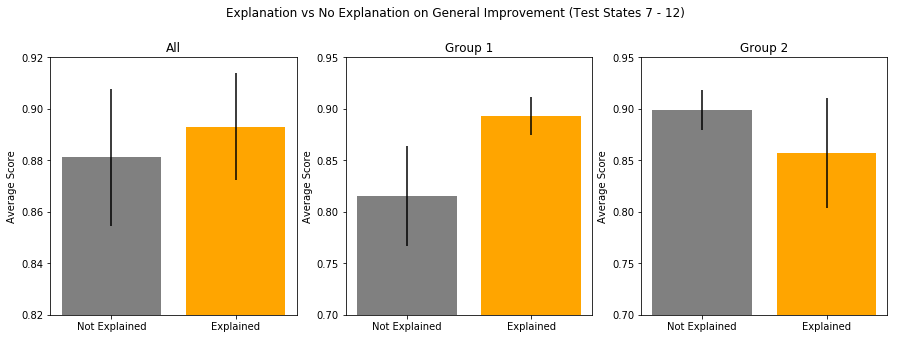

In [3]:
fig3, (ax3, ax4, ax5) = plt.subplots(1,3, figsize=(15,5))
df2 = df[(df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation")]
df3 = df[(df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
ax3.bar(x=[0, 1], height=[avg2, avg1], yerr = [stderr2, stderr1], color = ['grey', 'orange'], tick_label = ["Not Explained", "Explained"])
ax3.set_ylim(0.82, 0.92)
ax3.set_title("All")
ax3.set_ylabel("Average Score")

df2 = df[(df['group'] == 1) & ((df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation"))]
df3 = df[(df['group'] == 1) & (df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
ax4.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax4.set_ylim(0.7, 0.95)
ax4.set_title("Group 1")
ax4.set_ylabel("Average Score")

df2 = df[(df['group'] == 2) & ((df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation"))]
df3 = df[(df['group'] == 2) & (df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
ax5.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax5.set_ylim(0.7, 0.95)
ax5.set_title("Group 2")
ax5.set_ylabel("Average Score")

fig3.show()
fig3.subplots_adjust(top= .84)
plt.suptitle("Explanation vs No Explanation on General Improvement (Test States 7 - 12)")

fig3.savefig("fig1.pdf", bbox_inches='tight')

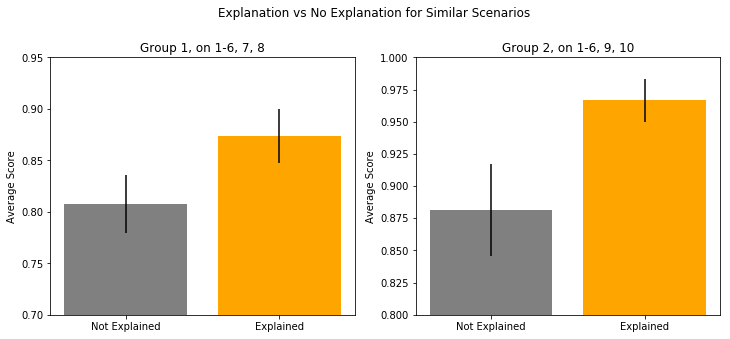

In [4]:
fig3, (ax3, ax4) = plt.subplots(1,2, figsize=(12,5))

df1 = df[(df['group'] == 1) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 1) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
ax3.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax3.set_ylim(0.7, 0.95)
ax3.set_title("Group 1, on 1-6, 7, 8")

df1 = df[(df['group'] == 2) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 2) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
ax4.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax4.set_ylim(0.8, 1)
ax4.set_title("Group 2, on 1-6, 9, 10")
ax3.set_ylabel("Average Score")
ax4.set_ylabel("Average Score")
fig3.suptitle("Explanation vs No Explanation for Similar Scenarios")
fig3.subplots_adjust(top= .84)
fig3.savefig("fig2.pdf", bbox_inches='tight')


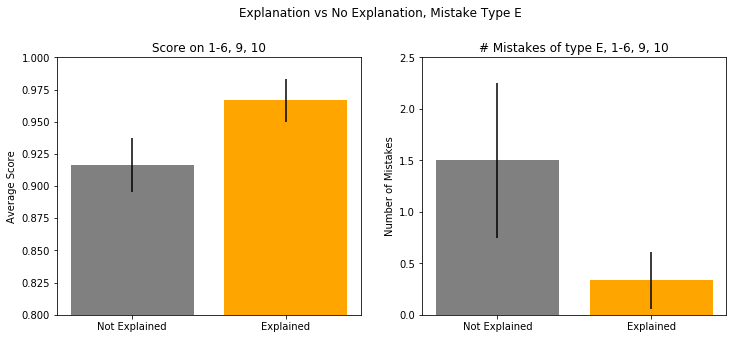

In [5]:
fig3, (ax3, ax4) = plt.subplots(1,2, figsize=(12,5))

df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
ax3.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax3.set_ylim(0.8, 1)
ax3.set_title("Score on 1-6, 9, 10")

df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]

avg1 = np.mean([1, 0, 0])
avg2 = np.mean([2, 1, 1, 2])
stderr1 = np.std([1, 0, 0]) /  np.sqrt(3)
stderr2 = np.mean([2, 1, 1, 2]) / np.sqrt(4)

ax4.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax4.set_ylim(0, 2.5)
ax4.set_title("# Mistakes of type E, 1-6, 9, 10")

ax3.set_ylabel("Average Score")
ax4.set_ylabel("Number of Mistakes")
fig3.suptitle("Explanation vs No Explanation, Mistake Type E")
fig3.subplots_adjust(top= .84)
fig3.savefig("fig3.pdf", bbox_inches='tight')


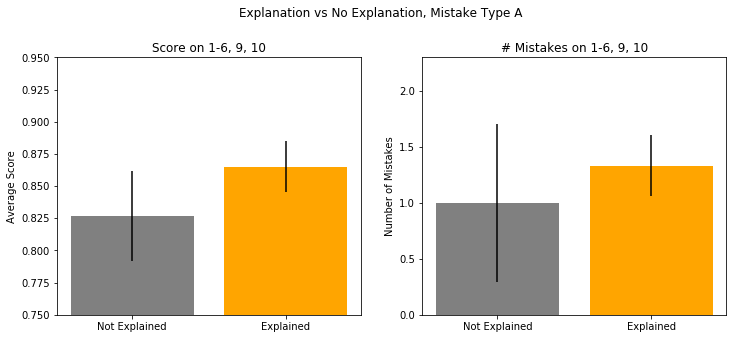

In [6]:
fig3, (ax3, ax4) = plt.subplots(1,2, figsize=(12,5))

df1 = df[(df['mistake type'] == CorrectionType.A) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['mistake type'] == CorrectionType.A) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
ax3.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax3.set_ylim(0.75, 0.95)
ax3.set_title("Score on 1-6, 9, 10")
df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]

avg1 = np.mean([2, 1, 1])
avg2 = np.mean([1, 1])
stderr1 = np.std([2, 1, 1]) /  np.sqrt(3)
stderr2 = np.mean([1, 1]) / np.sqrt(2)

ax4.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
ax4.set_ylim(0, 2.3)
ax4.set_title("# Mistakes on 1-6, 9, 10")

ax3.set_ylabel("Average Score")
ax4.set_ylabel("Number of Mistakes")
fig3.suptitle("Explanation vs No Explanation, Mistake Type A")
fig3.subplots_adjust(top= .84)
fig3.savefig("fig4.pdf", bbox_inches='tight')

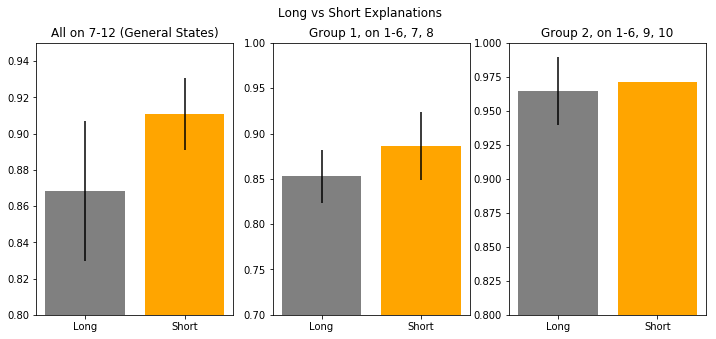

In [22]:
fig3, (ax3, ax4, ax5) = plt.subplots(1,3, figsize=(12,5))

df2 = df[(df['experiment group'] == "long explanation")]
df3 = df[(df['experiment group'] == "short explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
ax3.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'][::-1], tick_label = ["Long", "Short"])
ax3.set_ylim(0.8, 0.95)
ax3.set_title("All on 7-12 (General States)")

df1 = df[(df['group'] == 1) & (df['experiment group'] == "long explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 1) & (df['experiment group'] == "short explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
ax4.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'][::-1], tick_label = ["Long", "Short"])
ax4.set_ylim(0.7, 1)
ax4.set_title("Group 1, on 1-6, 7, 8")

df1 = df[(df['group'] == 2) & (df['experiment group'] == "long explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 2) & (df['experiment group'] == "short explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
ax5.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'][::-1], tick_label = ["Long", "Short"])
ax5.set_ylim(0.8, 1)
ax5.set_title("Group 2, on 1-6, 9, 10")

fig3.suptitle("Long vs Short Explanations")

fig3.savefig("fig5.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Long vs Short, Group 1, avg on 7-12 (General States)')

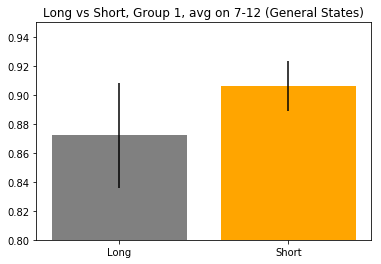

In [17]:
df2 = df[(df['group'] == 1) & ((df['experiment group'] == "long explanation"))]
df3 = df[(df['group'] == 1) & (df['experiment group'] == "short explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'][::-1], tick_label = ["Long", "Short"])
plt.ylim(0.8, 0.95)
plt.title("Long vs Short, Group 1, avg on 7-12 (General States)")

Text(0.5, 1.0, 'Long vs Short, Group2, on 7-12 (General States)')

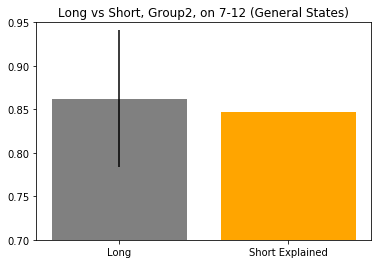

In [9]:


df2 = df[(df['group'] == 2) & ((df['experiment group'] == "long explanation"))]
df3 = df[(df['group'] == 2) & (df['experiment group'] == "short explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'][::-1], tick_label = ["Long", "Short Explained"])
plt.ylim(0.7, 0.95)
plt.title("Long vs Short, Group2, on 7-12 (General States)")

Text(0.5, 1.0, 'Explanation vs No Explanation, Group 2, on 1-6, 9, 10')

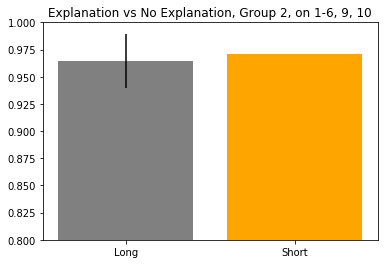

Text(0.5, 1.0, 'Expl vs No Expl, initial score')

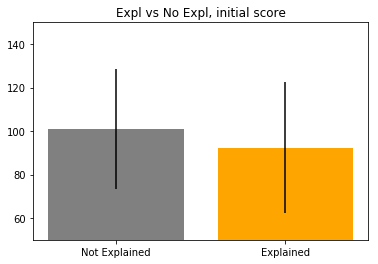

In [12]:
df1 = df[(df['experiment group'] != "no explanation")][['experiment group', 'initial score']]
df2 = df[(df['experiment group'] == "no explanation")][['experiment group', 'initial score']]

avg1 = np.mean(df1['initial score'])
avg2 = np.mean(df2['initial score'])

stderr1 = np.std(df1['initial score']) / math.sqrt(len(df1))
stderr2 = np.std(df2['initial score']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
plt.ylim(50, 150)
plt.title("Expl vs No Expl, initial score")

Text(0.5, 1.0, 'Expl vs No Expl, group 1, initial score')

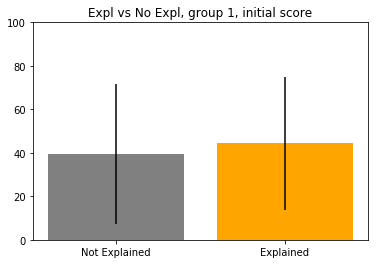

In [13]:
df1 = df[(df['experiment group'] != "no explanation") & (df['group'] == 1) ][['experiment group', 'initial score']]
df2 = df[(df['experiment group'] == "no explanation") & (df['group'] == 1)][['experiment group', 'initial score']]
avg1 = np.mean(df1['initial score'])
avg2 = np.mean(df2['initial score'])

stderr1 = np.std(df1['initial score']) / math.sqrt(len(df1))
stderr2 = np.std(df2['initial score']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
plt.ylim(0, 100)
plt.title("Expl vs No Expl, group 1, initial score")

Text(0.5, 1.0, 'Expl vs No Expl, group 1, initial score')

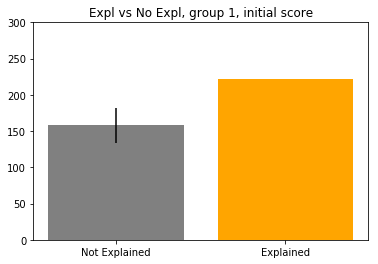

In [14]:
df1 = df[(df['experiment group'] != "no explanation") & (df['group'] == 2) ][['experiment group', 'initial score']]
df2 = df[(df['experiment group'] == "no explanation") & (df['group'] == 2)][['experiment group', 'initial score']]
avg1 = np.mean(df1['initial score'])
avg2 = np.mean(df2['initial score'])

stderr1 = np.std(df1['initial score']) / math.sqrt(len(df1))
stderr2 = np.std(df2['initial score']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
plt.ylim(0, 300)
plt.title("Expl vs No Expl, group 1, initial score")

In [15]:
df2 = df[(df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation")]
df3 = df[(df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['initperf'])
avg2 = np.mean(df3['initperf'])
stderr1 = np.std(df2['initperf']) / math.sqrt(len(df2))
stderr2 = np.std(df3['initperf']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2][::-1], yerr = [stderr1, stderr2][::-1], color = ['orange', 'grey'][::-1], tick_label = ["Explained", "Not Explained"][::-1])
plt.ylim(0.8, 0.92)
plt.title("Explanation vs No Explanation initial performance")

KeyError: 'initperf'

In [16]:
df2 = df[(df['group'] == 1) & ((df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation"))]
df3 = df[(df['group'] == 1) & (df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['initperf'])
avg2 = np.mean(df3['initperf'])
stderr1 = np.std(df2['initperf']) / math.sqrt(len(df2))
stderr2 = np.std(df3['initperf']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.7, 0.95)
plt.ylabel("initial average performance")
plt.title("Explanation vs No Explanation, Group 1, initial performance")

KeyError: 'initperf'

Text(0.5, 1.0, 'Long vs Short on initial performance')

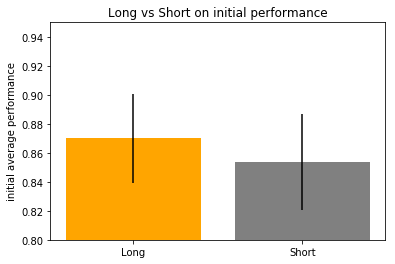

In [41]:
df2 = df[(df['experiment group'] == "long explanation")]
df3 = df[(df['experiment group'] == "short explanation")]
avg1 = np.mean(df2['initperf'])
avg2 = np.mean(df3['initperf'])
stderr1 = np.std(df2['initperf']) / math.sqrt(len(df2))
stderr2 = np.std(df3['initperf']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Long", "Short"])
plt.ylim(0.8, 0.95)
plt.ylabel("initial average performance")
plt.title("Long vs Short on initial performance")